## FETCHING DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_option_data=pd.read_csv('/content/hal_ki_chain.csv')

In [3]:

df_option_data.head()
requirred_data=df_option_data.iloc[:,[4,10]]
requirred_data



,LTP,STRIKE
0,740,4000.0
1,-,4100.0
2,553.9,4200.0
3,519.35,4300.0
4,412,4400.0
5,314,4500.0
6,254.35,4600.0
7,200.65,4700.0
8,155.7,4800.0
9,120.8,4900.0


In [4]:
new_data_frame=requirred_data.drop(index=[1]).reset_index(drop=True)
new_data_frame['LTP']=new_data_frame['LTP'].astype(float)
new_data_frame['STRIKE']=new_data_frame['STRIKE'].astype(str).str.replace(',','').astype(float)

new_data_frame
my_strike_list=new_data_frame.iloc[:,1]
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


## CALCULATING ALL POSSIBLE SPREAD AND MAX_LOSS

In [5]:


my_outer_list=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,0]-new_data_frame.iloc[j,0])

  my_outer_list.append(my_list)

df_max_loss=pd.DataFrame(my_outer_list)

my_outer_list_spread=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,1]-new_data_frame.iloc[j,1])

  my_outer_list_spread.append(my_list)

df_spread=pd.DataFrame(my_outer_list_spread)

print(df_spread,df_max_loss)

        0       1       2       3       4       5       6       7       8   \
0      0.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0  -800.0  -900.0   
1    200.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0   
2    300.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0   
3    400.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0   
4    500.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0   
5    600.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0   
6    700.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0   
7    800.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0   
8    900.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0   
9   1000.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0   
10  1100.0   900.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   
11  1200.0  1000.0   900.0   800.0   700.0   600.0   500.0   400

## CALCULATING REAWRD TO RISK

In [6]:

df_risk_reward=(-df_spread-df_max_loss)/df_max_loss
# print(df_risk_reward)
df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna().drop_duplicates()
my_loss_listt=[]
my_max_profit_list=[]
for i in range(len(df_risk_reward)):
  my_loss_listt.append(df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])
  my_max_profit_list.append(-df_spread.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]]-df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])

df_risk_reward=pd.DataFrame(df_risk_reward)
df_risk_reward['loss']=my_loss_listt
df_risk_reward['profit']=my_max_profit_list

df_risk_reward=df_risk_reward[df_risk_reward['loss']>0 ]
df_risk_reward=df_risk_reward[df_risk_reward[0]>0 ]

In [7]:
strike_1=[]
strike_2=[]
for i in range(len(df_risk_reward)):
  strike_1.append(my_strike_list[df_risk_reward.index[i][0]])
  strike_2.append(my_strike_list[df_risk_reward.index[i][1]])
df_risk_reward['strike_1']=strike_1
df_risk_reward['strike_2']=strike_2
df_risk_reward.columns=['reward','loss','profit','strike_1','strike_2']
df_risk_reward.reset_index(drop=True)
df_risk_reward.index
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_risk_reward)

https://docs.google.com/spreadsheets/d/1GqG0JA5Ql5TOoC37MA_VLKncrhtLapEZ24GHqfn8qew#gid=0


## CALCULATING VOLATILTY AND PREDICTING PRICE RANGE OVER A TIME PERIOD

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=yf.download(tickers='HAL.NS',period='max',interval='1d')
req_data=data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [10]:
req_data

,Adj Close
Date,
2018-04-02,480.766541
2018-04-03,472.128021
2018-04-04,466.815186
2018-04-05,465.999451
2018-04-06,461.356049
2018-04-09,462.025330
2018-04-10,461.125977
2018-04-11,459.034332
2018-04-12,454.369904


In [11]:
req_data=pd.DataFrame(req_data)
req_data.reset_index(inplace=True)


per_change=[None]


for i in range(1,len(req_data)):
  change=((req_data.iloc[i,1]-req_data.iloc[i-1,1])/req_data.iloc[i-1,1])*100
  per_change.append(change)


req_data['%change']=per_change

req_data=req_data.drop(index=0)





In [12]:
req_data
mean=req_data['%change'].mean()
std=req_data['%change'].std()
print(mean,std)

0.172891874179142 2.340787044806351


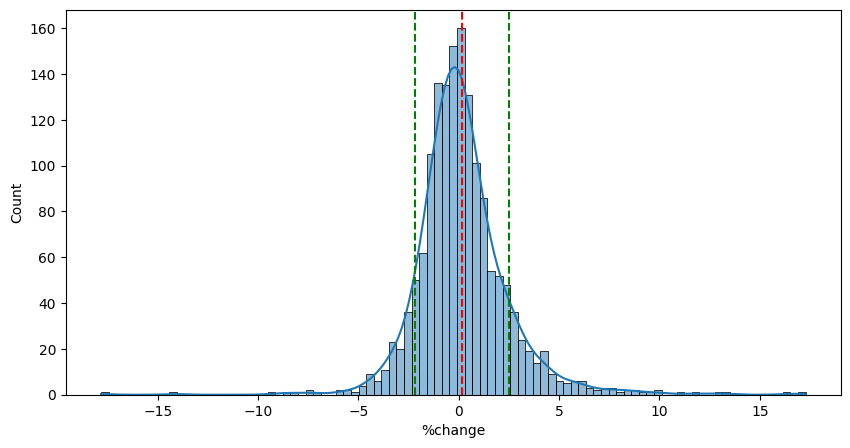

In [78]:
import math
plt.figure(figsize=(10,5))
sns.histplot(req_data['%change'],kde=True)
plt.axvline(mean,color='r',linestyle='--')
plt.axvline(mean+std,color='g',linestyle='--')
plt.axvline(mean-std,color='g',linestyle='--')
plt.show()



In [57]:
pos_change_in_next_ndays=20*mean+std*math.sqrt(20)
neg_change_in_next_ndays=20*mean-std*math.sqrt(20)
print(pos_change_in_next_ndays,neg_change_in_next_ndays)
print('\n')
current_price=4700
print(current_price*(1+pos_change_in_next_ndays/100))
print(current_price*(1+neg_change_in_next_ndays/100))



13.926155389658533 -7.010480422492853


5354.5293033139515
4370.507420142835


In [58]:
#range expected after results
estimated_current_price_at_result_date=4700
pos_change_in_next_ndays=14*mean+std*math.sqrt(14)
neg_change_in_next_ndays=14*mean-std*math.sqrt(14)

upper_target=estimated_current_price_at_result_date*(1+pos_change_in_next_ndays/100)
lower_target=estimated_current_price_at_result_date*(1+neg_change_in_next_ndays/100)
print(upper_target,lower_target)

5225.408740651904 4402.116965767847


## FUNDAMENTAL_ANALYSIS

In [16]:
df_quat_combined=pd.read_excel('/content/COMBINED.xlsx')
df_quat_combined
df_quat_combined=df_quat_combined.iloc[[0,3,7,17,18,19,23,25]].reset_index(drop=True)

df_quat_combined.columns=df_quat_combined.iloc[0]
df_quat_combined=df_quat_combined.drop(index=0)
# display an interactive google sheet

df_quat_combined


,NaN,Mar '24,Dec '23,Sep '23,Jun '23,Mar '23,Dec '22,Sep '22,Jun '22,Mar '22,...,Sep '20,Jun '20,Mar '20,Dec '19,Sep '19,Jun '19,Mar '19,Dec '18,Sep '18,Jun '18
1,Total Income From Operations,"14,768.75","6,061.28","5,635.70","3,915.35","12,494.67","5,665.54","5,144.79","3,622.46","11,561.13",...,"4,853.60","1,736.74","10,323.00","4,456.35","3,451.07","3,291.44","10,044.44","4,425.29","2,610.33","2,813.82"
2,Increase/Decrease in Stocks,"-1,927.33",-110.86,227.68,-148.13,-674.09,255.15,25.95,-297.73,776.15,...,304.86,"-1,327.55","2,410.51","-1,012.55",-328.13,-358.41,"2,445.44",118.38,"-1,273.74",-122.54
3,"P/L Before Other Inc., Int., Excpt. Items &\nTax","5,257.29","1,223.16","1,177.99",675.45,"2,190.18",716.56,"1,369.66",618.08,"2,117.33",...,809.78,273.09,"1,992.23",670.87,535.32,731.41,"1,984.11",651.79,380.24,386.57
4,Other Income,557.31,459.98,469.37,409.94,722.23,497.18,259.07,191.64,500.66,...,87.97,47.25,159.96,33.18,41.03,59.73,119.40,57.39,70.03,129.29
5,"P/L Before Int., Excpt. Items & Tax","5,814.60","1,683.14","1,647.36","1,085.39","2,912.41","1,213.74","1,628.73",809.72,"2,617.99",...,897.75,320.34,"2,152.19",704.05,576.35,791.14,"2,103.51",709.18,450.27,515.86
6,P/L Before Tax,"5,783.19","1,682.78","1,647.04","1,085.37","2,857.11","1,211.67","1,628.36",809.49,"2,575.88",...,826.29,215.70,"2,051.20",646.00,480.93,816.06,"1,969.83",680.89,448.88,509.62
7,P/L After Tax from Ordinary Activities,"4,296.87","1,254.86","1,232.29",810.43,"2,844.64","1,153.92","1,218.94",607.36,"3,103.99",...,615.05,149.54,"1,249.63",457.32,621.30,562.39,"1,172.94",452.58,285.75,352.75


<ipython-input-17-d27171f3154f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))


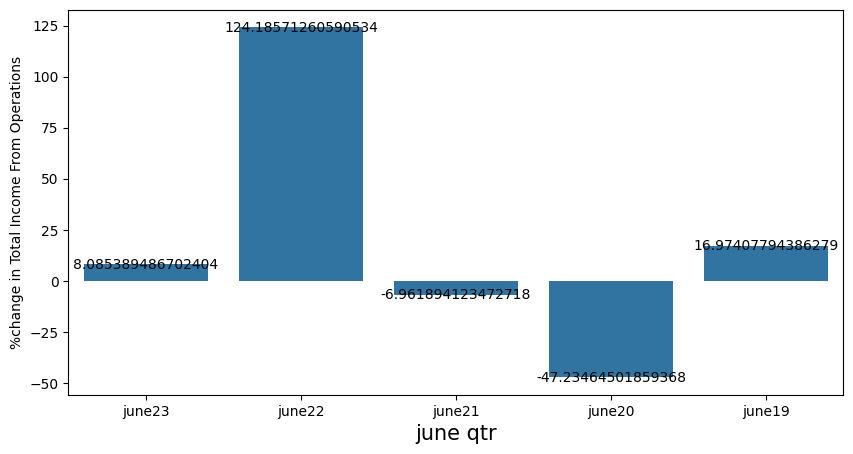

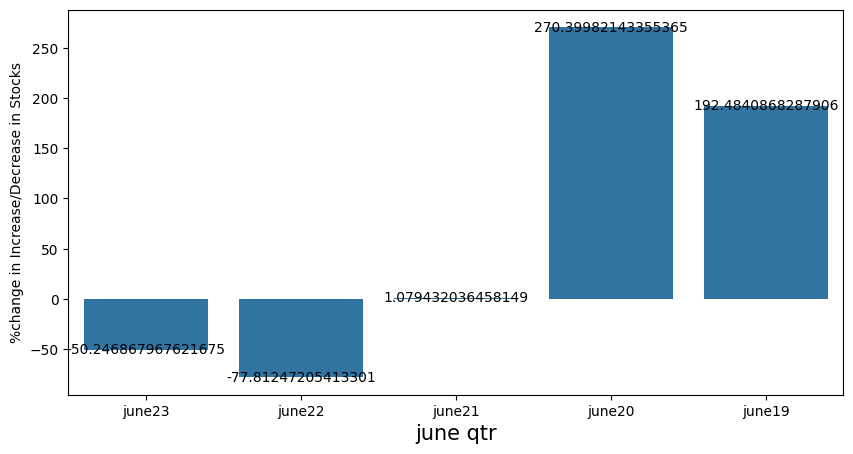

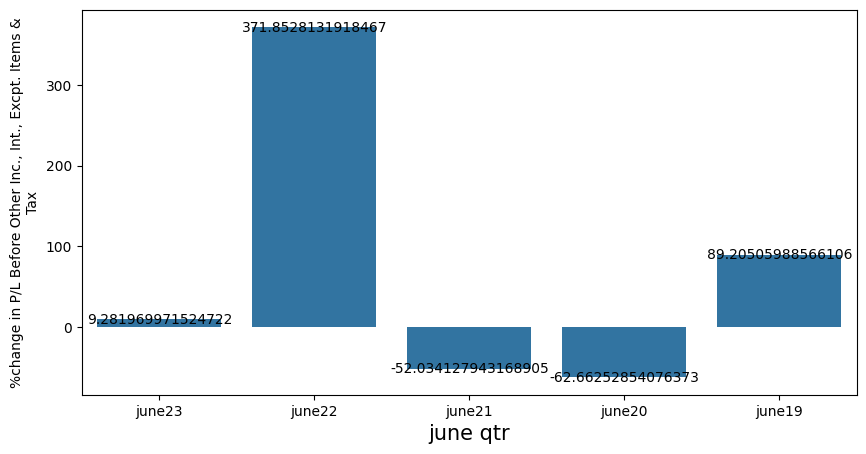

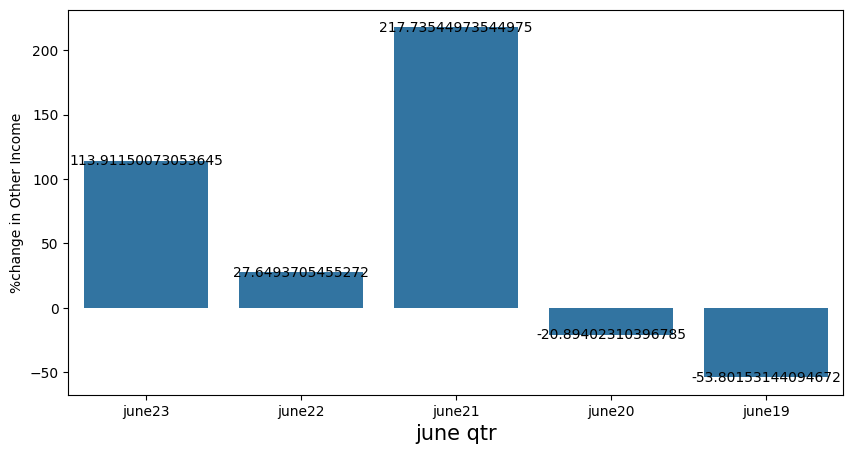

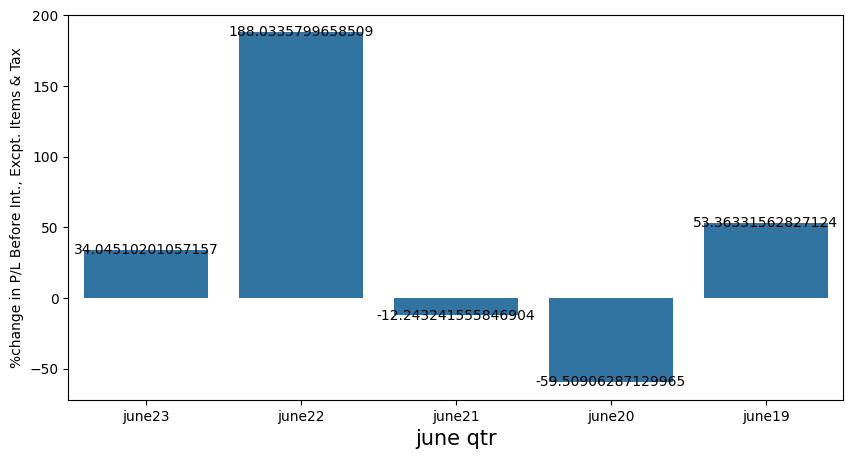

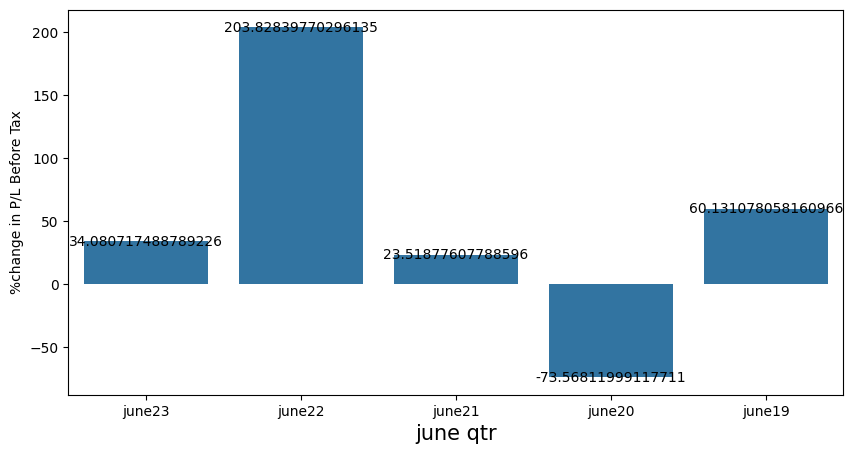

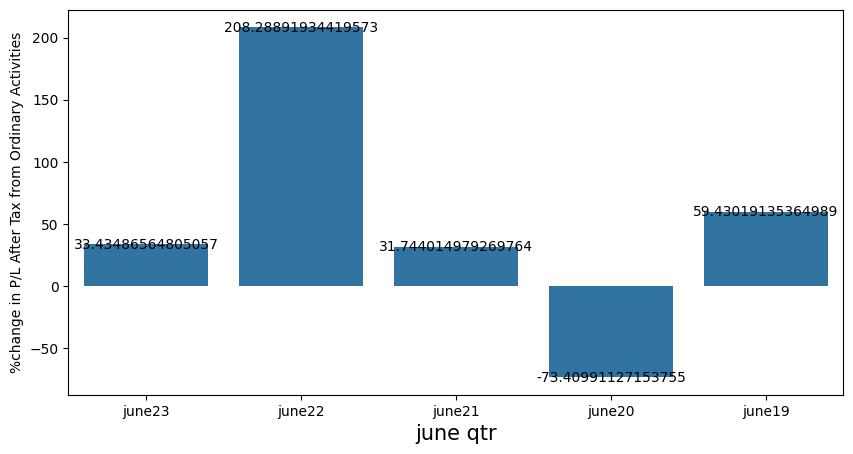

In [17]:
df_only_june_data=df_quat_combined.iloc[:,[0,4,8,12,16,20,24]]
df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))
df_only_june_data

df_only_june_data_perc_increase_outer=[]

for i in range(len(df_only_june_data)):
  df_only_june_data_perc_increase=[]
  for  j in range(1,len(df_only_june_data.columns)-1):
    df_only_june_data_perc_increase.append(((df_only_june_data.iloc[i,j]-df_only_june_data.iloc[i,j+1])/df_only_june_data.iloc[i,j+1]))
  df_only_june_data_perc_increase_outer.append(df_only_june_data_perc_increase)


for i  in range(len(df_only_june_data_perc_increase_outer)):
  df_only_june_data_per_change_df=pd.DataFrame(df_only_june_data_perc_increase_outer)
  x_data=['june23','june22','june21','june20','june19']
  plt.figure(figsize=(10,5))
  ax=sns.barplot(x=x_data,y=df_only_june_data_per_change_df.iloc[i]*100)
  plt.ylabel(f'%change in {df_only_june_data.iloc[i,0]}',size=10)
  plt.xlabel('june qtr',size=15)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='center')


plt.show()

## QTR WISE SHARE IN REVENUE AND PROFIT

In [18]:


my_dict={}
for i,year in enumerate(range(24,18,-1)):
  start_col=1+i*4
  end_col=start_col+4
  my_dict[f'fy_{year}']=df_quat_combined.iloc[:,start_col:end_col]

for i in my_dict:
  my_dict[i]=my_dict[i].apply(lambda x: x.str.replace(',','').astype(float))
  my_dict[i]['total']=my_dict[i].sum(axis=1)
  for j in range(5):
    my_dict[i].iloc[:,j]=my_dict[i].iloc[:,j]/my_dict[i].iloc[:,4]


fy_24, fy_23, fy_22, fy_21, fy_20, fy_19 = [my_dict[f'fy_{year}'] for year in range(24, 18, -1)]



print(fy_24)
print(fy_23)
print(fy_22)
print(fy_21)
print(fy_20)
print(fy_19)




0   Mar '24   Dec '23   Sep '23   Jun '23  total
1  0.486117  0.199508  0.185500  0.128875    1.0
2  0.984014  0.056600 -0.116244  0.075629    1.0
3  0.630833  0.146769  0.141349  0.081049    1.0
4  0.293847  0.242529  0.247480  0.216145    1.0
5  0.568360  0.164522  0.161025  0.106094    1.0
6  0.567069  0.165005  0.161500  0.106426    1.0
7  0.565791  0.165234  0.162262  0.106713    1.0
0   Mar '23   Dec '22   Sep '22   Jun '22  total
1  0.464012  0.210400  0.191061  0.134527    1.0
2  0.975924 -0.369397 -0.037569  0.431043    1.0
3  0.447480  0.146402  0.279838  0.126281    1.0
4  0.432442  0.297691  0.155121  0.114746    1.0
5  0.443654  0.184892  0.248108  0.123346    1.0
6  0.439107  0.186221  0.250262  0.124410    1.0
7  0.488362  0.198103  0.209265  0.104270    1.0
0   Mar '22   Dec '21   Sep '21   Jun '21  total
1  0.469582  0.239313  0.225473  0.065631    1.0
2  1.310400  1.503799  0.451342 -2.265541    1.0
3  0.492628  0.245017  0.231878  0.030477    1.0
4  0.508320  0.19977

BASED ON PREV QTR QTR ON QTR

OF REVENUE=8.08%

OF EARNINGS=34.6%

BASED ON TRADING VIEW

REVENUE=15.2%

EARNINGS=7.6%



## HOW CORRECTLY MARKET PREDICTED MARKET

In [19]:
revenue_in_year_=df_quat_combined.iloc[0,:]

revenue_in_year_.iloc[1:]=revenue_in_year_.iloc[1:].str.replace( ',','').astype(float)
revenue_in_year_

# revenue_in_year_['increase_inrev_froom_past_qtr']=[revenue_in_year_[0]]


,1
0,
NaN,Total Income From Operations
Mar '24,14768.75
Dec '23,6061.28
Sep '23,5635.7
Jun '23,3915.35
Mar '23,12494.67
Dec '22,5665.54
Sep '22,5144.79
Jun '22,3622.46


In [20]:
revenue_df=pd.DataFrame(revenue_in_year_.reset_index())
revenue_df=revenue_df.drop(index=0)
revenue_df.columns=['qtr','revenue']

revenue_df




,qtr,revenue
1,Mar '24,14768.75
2,Dec '23,6061.28
3,Sep '23,5635.7
4,Jun '23,3915.35
5,Mar '23,12494.67
6,Dec '22,5665.54
7,Sep '22,5144.79
8,Jun '22,3622.46
9,Mar '22,11561.13
10,Dec '21,5891.9


In [21]:

import yfinance as yf
import pandas as pd

# Example list of quarterly revenues
quarterly_revenues_data = {
    'qtr': ["Mar '24", "Dec '23", "Sep '23", "Jun '23", "Mar '23", "Dec '22", "Sep '22", "Jun '22", "Mar '22", "Dec '21",
            "Sep '21", "Jun '21", "Mar '21", "Dec '20", "Sep '20", "Jun '20", "Mar '20", "Dec '19", "Sep '19", "Jun '19",
            "Mar '19", "Dec '18", "Sep '18", "Jun '18"],
    'revenue': [14768.75, 6061.28, 5635.7, 3915.35, 12494.67, 5665.54, 5144.79, 3622.46, 11561.13, 5891.9,
                5551.16, 1615.83, 10738.74, 5425.46, 4853.6, 1736.74, 10323.0, 4456.35, 3451.07, 3291.44,
                10044.44, 4425.29, 2610.33, 2813.82]
}

# Convert the data to a DataFrame
quarterly_revenues_df = pd.DataFrame(quarterly_revenues_data)

# Function to map dates to quarters
def get_quarter(date):
    month = date.month
    year = date.year
    if month in [1, 2, 3]:
        return f"Mar '{year % 100:02d}"
    elif month in [4, 5, 6]:
        return f"Jun '{year % 100:02d}"
    elif month in [7, 8, 9]:
        return f"Sep '{year % 100:02d}"
    else:
        return f"Dec '{year % 100:02d}"

# Function to calculate the ratio
def calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date):
    # Fetch historical market cap data
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)

    # Calculate market cap using Close price and Shares Outstanding
    hist['Market Cap'] = hist['Close'] * stock.info['sharesOutstanding']

    # Calculate daily market cap changes
    hist['Market Cap Change'] = hist['Market Cap'].diff()

    # Number of days in the quarter (assuming 90 days for simplicity)
    days_in_quarter = {
        'Jun': 90,
        'Sep': 91,
        'Dec': 92,
        'Mar': 92
    }

    # Function to get daily revenue for a specific date
    def get_daily_revenue(date):
        quarter = get_quarter(date)
        quarterly_revenue = quarterly_revenues_df.loc[quarterly_revenues_df['qtr'] == quarter, 'revenue'].values[0]
        quarter_key = quarter.split(' ')[0]
        return quarterly_revenue / days_in_quarter[quarter_key]

    # Calculate daily revenue for each date
    hist['Daily Revenue'] = hist.index.to_series().apply(get_daily_revenue)

    # Calculate the ratio considering weekends and holidays
    hist['Ratio'] = None
    for i in range(1, len(hist)):
        market_cap_change = hist['Market Cap Change'].iloc[i]
        days_diff = (hist.index[i] - hist.index[i-1]).days
        daily_revenue = (hist['Daily Revenue'].iloc[i])*pow(10,7)
        hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)

    return hist

# Example parameters
ticker = 'HAL.NS'
start_date = '2018-04-01'
end_date = '2024-03-31'

# Calculate the ratio
df = calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date)
print(df[['Market Cap', 'Market Cap Change', 'Daily Revenue', 'Ratio']])



Streaming output truncated to the last 5000 lines.
<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                             Market Cap  Market Cap Change  Daily Revenue  \
Date                                                                        
2018-04-02 00:00:00+05:30  3.215246e+11                NaN      31.264667   
2018-04-03 00:00:00+05:30  3.157474e+11      -5.777185e+09      31.264667   
2018-04-04 00:00:00+05:30  3.121943e+11      -3.553051e+09      31.264667   
2018-04-05 00:00:00+05:30  3.116488e+11      -5.455431e+08      31.264667   
2018-04-06 00:00:00+05:30  3.085434e+11      -3.105391e+09      31.264667   
...                                 ...                ...            ...   
2024-03-21 00:00:00+05:30  2.087481e+12       9.419702e+10     160.529891   
2024-03-22 00:00:00+05:30  2.120552e+12       3.307089e+10     160.529891   
2024-03-26 00:00:00+05:30  2.207492e+12       8.694075e+10     160.529891   
2024-03-27 00:00:00+05:30  2.194284e+12      -1.320831e+10     160.529891   
2024-03-28 00:00:00+05:30  2.225014e+12       3.073018e+10     160.529891   

<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-21-7bc1175a877c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (dail

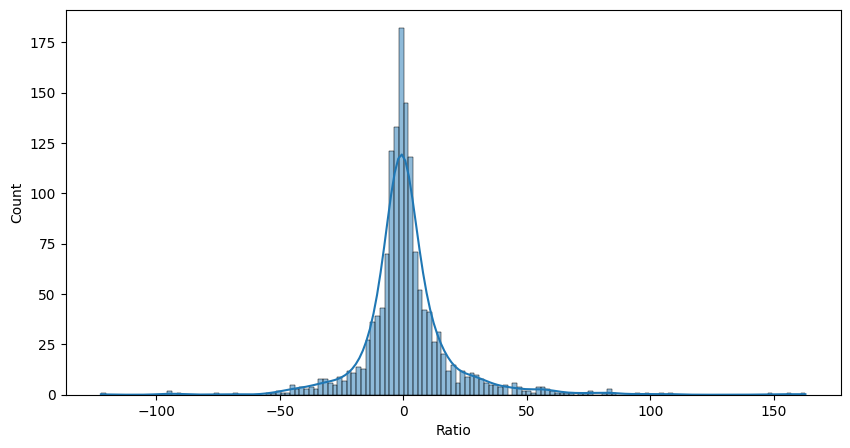

1.5482834546807247 19.430723291677907 162.89453667386778 -122.48557716326833
                                  Open         High          Low        Close  \
Date                                                                            
2024-03-14 00:00:00+05:30  3053.949951  3177.899902  3017.050049  3165.949951   
2024-03-15 00:00:00+05:30  3164.949951  3182.550049  3006.000000  3099.100098   
2024-03-18 00:00:00+05:30  3138.000000  3184.000000  3105.399902  3121.949951   
2024-03-19 00:00:00+05:30  3111.750000  3144.399902  3034.350098  3058.899902   
2024-03-20 00:00:00+05:30  3074.000000  3080.000000  2913.600098  2980.500000   
2024-03-21 00:00:00+05:30  3024.000000  3128.449951  3020.000000  3121.350098   
2024-03-22 00:00:00+05:30  3114.050049  3209.899902  3085.000000  3170.800049   
2024-03-26 00:00:00+05:30  3193.000000  3305.000000  3180.000000  3300.800049   
2024-03-27 00:00:00+05:30  3317.000000  3324.899902  3245.000000  3281.050049   
2024-03-28 00:00:00+05:30  3291.

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['Ratio'],kde=True)
plt.show()

print(df['Ratio'].mean(),df['Ratio'].std(),df['Ratio'].max(),df['Ratio'].min())
print(df.tail(10))

## MONTE CARLO SIMULATIONS

In [79]:
import numpy as np
import matplotlib.pyplot as plt
for price in [4300,4370,4500,4950,5100,5180,4695]:
# Define inputs
  current_price = price
  mean_return = mean
  volatility = std
  days = 18
  num_simulations = 10000  # Adjust this to a higher number if needed

  # Initialize array to store the price paths
  price_paths = np.zeros((days + 1, num_simulations))

  # Set the initial price
  price_paths[0] = current_price

  # Run simulations
  for i in range(num_simulations):
      for t in range(1, days + 1):
          daily_return = np.random.normal(mean_return, volatility)
          price_paths[t, i] = price_paths[t-1, i] * (1 + daily_return/100)

  # Plotting the simulation paths
  # plt.figure(figsize=(10, 6))
  # plt.plot(price_paths)
  # plt.title('Monte Carlo Simulation of Stock Price Over 5 Days')
  # plt.xlabel('Days')
  # plt.ylabel('Stock Price')

  # plt.grid(True)
  # plt.show()

  # Calculate percentiles for the final prices
  final_prices = price_paths[-1]
  lower_bound = np.percentile(final_prices, 5)
  upper_bound = np.percentile(final_prices, 95)

  print(f"5th Percentile Price: ${lower_bound:.2f}","for ",price)
  print(f"95th Percentile Price: ${upper_bound:.2f}","for",price)
  print("\n")



5th Percentile Price: $3757.39 for  4300
95th Percentile Price: $5194.22 for 4300


5th Percentile Price: $3810.19 for  4370
95th Percentile Price: $5273.47 for 4370


5th Percentile Price: $3916.60 for  4500
95th Percentile Price: $5453.98 for 4500


5th Percentile Price: $4294.81 for  4950
95th Percentile Price: $5976.07 for 4950


5th Percentile Price: $4435.92 for  5100
95th Percentile Price: $6161.22 for 5100


5th Percentile Price: $4506.71 for  5180
95th Percentile Price: $6253.80 for 5180


5th Percentile Price: $4085.30 for  4695
95th Percentile Price: $5672.03 for 4695




In [83]:
for price in [4300,4370,4500,4950,5100,5180,4695]:
  print("linear range upper bound",price*(1+(4*mean+std*math.sqrt(18))/100), "for price :",price)
  print("linear range lower bound",price*(1+(4*mean-std*math.sqrt(18))/100), "for price :",price)
  print("\n")
  print("exponential range upper bound",price*pow((1+(mean+std)/100),18), "for price :",price)
  print("exponential range lower bound",price*pow((1+(mean-std)/100),18), "for price :",price)
  print("\n")
  # print(std,mean)

linear range upper bound 4756.775491674429 for price : 4300
linear range lower bound 3902.6993130431956 for price : 4300


exponential range upper bound 6722.660881563471 for price : 4300
exponential range lower bound 2898.2350733008047 for price : 4300


linear range upper bound 4834.211371771455 for price : 4370
linear range lower bound 3966.2316274415734 for price : 4370


exponential range upper bound 6832.099547077295 for price : 4370
exponential range lower bound 2945.415644261516 for price : 4370


linear range upper bound 4978.020863380217 for price : 4500
linear range lower bound 4084.2202113242747 for price : 4500


exponential range upper bound 7035.342783031539 for price : 4500
exponential range lower bound 3033.0367046171214 for price : 4500


linear range upper bound 5475.822949718238 for price : 4950
linear range lower bound 4492.642232456702 for price : 4950


exponential range upper bound 7738.877061334693 for price : 4950
exponential range lower bound 3336.34037507883

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs
for price in [4300,4370,4500,4950,5100,5180,4695]:
  current_price = price
  daily_mean_return = mean/100  # Daily mean return
  daily_volatility = std/100  # Daily volatility
  days = 18
  num_simulations = 10000
  dt = 1  # time step (1 day)

  # Initialize array to store price paths
  price_paths = np.zeros((days + 1, num_simulations))
  price_paths[0] = current_price

  # Run simulations
  for i in range(num_simulations):
      for t in range(1, days + 1):
          # Simulate random component
          rand = np.random.normal(0, 1)
          # Calculate the price using GBM formula
          price_paths[t, i] = price_paths[t-1, i] * np.exp((daily_mean_return - 0.5 * daily_volatility**2) * dt + daily_volatility * np.sqrt(dt) * rand)

  # Plotting the simulation paths
  # plt.figure(figsize=(10, 6))
  # plt.plot(price_paths)
  # plt.title('Geometric Brownian Motion Simulation of Stock Price Over 5 Days')
  # plt.xlabel('Days')
  # plt.ylabel('Stock Price')
  # plt.grid(True)
  # plt.show()

  # Calculate percentiles for the final prices
  final_prices = price_paths[-1]
  lower_bound = np.percentile(final_prices, 5)
  upper_bound = np.percentile(final_prices, 95)

  print(f"5th Percentile Price: ${lower_bound:.2f}","for",price)
  print(f"95th Percentile Price: ${upper_bound:.2f}","for",price)
  print("\n")


5th Percentile Price: $3743.42 for 4300
95th Percentile Price: $5182.84 for 4300


5th Percentile Price: $3802.87 for 4370
95th Percentile Price: $5274.09 for 4370


5th Percentile Price: $3906.45 for 4500
95th Percentile Price: $5426.26 for 4500


5th Percentile Price: $4311.08 for 4950
95th Percentile Price: $5988.45 for 4950


5th Percentile Price: $4447.61 for 5100
95th Percentile Price: $6173.85 for 5100


5th Percentile Price: $4506.39 for 5180
95th Percentile Price: $6269.06 for 5180


5th Percentile Price: $4092.18 for 4695
95th Percentile Price: $5666.71 for 4695




In [85]:
std*math.sqrt(252)

37.15884235631647